### Import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Preprocessing data

Handle autolist

In [4]:

cars_autolist_df = pd.read_csv("cars_autolist.csv")
cars_autolist_df


,id,vin,name,model_id,make_name,model_name,body_style,condition,door_count,driveline,...,transmission,trim,year,total_price_change,rear_wheel,heated_seats,leather,normalized_color_exterior,normalized_color_interior,mileage
0,290391038,19XFL2H82NE015878,Honda Civic,862.0,Honda,Civic,hatchback,used,4.0,FWD,...,automatic,Sport,2022,-100.0,NaN,False,False,gray,black,28389.0
1,285098214,3FA6P0LU5HR307508,Ford Fusion Hybrid,959.0,Ford,Fusion Hybrid,sedan,used,4.0,FWD,...,automatic,SE,2017,-1269.0,NaN,False,False,gray,NaN,45651.0
2,289346692,JF1GR89678L822739,Subaru Impreza,1090.0,Subaru,Impreza,wagon,used,4.0,AWD,...,manual,WRX STI,2008,-400.0,NaN,False,True,white,black,80786.0
3,288847695,JF1ZNAA13L9752660,Toyota 86,2149.0,Toyota,86,coupe,used,2.0,RWD,...,manual,Base,2020,0.0,NaN,False,False,NaN,black,8713.0
4,283656004,JN1EV7AP0LM200887,Infiniti Q50,1617.0,Infiniti,Q50,sedan,used,4.0,RWD,...,automatic,3.0T Sport,2020,-2290.0,NaN,True,True,white,gray,35839.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,289862734,3FMCR9C69RRE96707,Ford Bronco Sport,2371.0,Ford,Bronco Sport,suv,new,4.0,AWD,...,automatic,Outer Banks,2024,1000.0,NaN,False,True,white,black,NaN
9996,285981184,3FTTW8H3XRRA69266,Ford Maverick,2463.0,Ford,Maverick,truck,new,4.0,FWD,...,automatic,XLT,2024,-3500.0,single,True,False,black,black,2.0
9997,289604941,1FA6P8CF3R5426727,Ford Mustang,969.0,Ford,Mustang,coupe,new,2.0,RWD,...,automatic,GT,2024,-2000.0,NaN,False,False,black,black,NaN
9998,289604942,1FA6P8CF6R5426432,Ford Mustang,969.0,Ford,Mustang,coupe,new,2.0,RWD,...,automatic,GT Premium,2024,-2000.0,NaN,False,False,black,black,NaN


In [5]:

cars_autolist_df.rename(columns={"driveline":"drivetrain"}, inplace=True)
cars_autolist_df=cars_autolist_df.drop(['condition','previous_price','engine_cylinders',
                                        'model_id','quality_score','total_price_change',
                                        'rear_wheel','heated_seats','leather', 'year'],axis=1)
cars_autolist_df

,id,vin,name,make_name,model_name,body_style,door_count,drivetrain,fuel_type,price,transmission,trim,normalized_color_exterior,normalized_color_interior,mileage
0,290391038,19XFL2H82NE015878,Honda Civic,Honda,Civic,hatchback,4.0,FWD,gasoline,22899,automatic,Sport,gray,black,28389.0
1,285098214,3FA6P0LU5HR307508,Ford Fusion Hybrid,Ford,Fusion Hybrid,sedan,4.0,FWD,hybrid,14730,automatic,SE,gray,NaN,45651.0
2,289346692,JF1GR89678L822739,Subaru Impreza,Subaru,Impreza,wagon,4.0,AWD,gasoline,21199,manual,WRX STI,white,black,80786.0
3,288847695,JF1ZNAA13L9752660,Toyota 86,Toyota,86,coupe,2.0,RWD,gasoline,26999,manual,Base,NaN,black,8713.0
4,283656004,JN1EV7AP0LM200887,Infiniti Q50,Infiniti,Q50,sedan,4.0,RWD,gasoline,28391,automatic,3.0T Sport,white,gray,35839.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,289862734,3FMCR9C69RRE96707,Ford Bronco Sport,Ford,Bronco Sport,suv,4.0,AWD,gasoline,35685,automatic,Outer Banks,white,black,NaN
9996,285981184,3FTTW8H3XRRA69266,Ford Maverick,Ford,Maverick,truck,4.0,FWD,hybrid,33975,automatic,XLT,black,black,2.0
9997,289604941,1FA6P8CF3R5426727,Ford Mustang,Ford,Mustang,coupe,2.0,RWD,gasoline,44790,automatic,GT,black,black,NaN
9998,289604942,1FA6P8CF6R5426432,Ford Mustang,Ford,Mustang,coupe,2.0,RWD,gasoline,53490,automatic,GT Premium,black,black,NaN


In [6]:
cars_autolist_df['drivetrain'] = cars_autolist_df['drivetrain'].str.replace(r'[^a-zA-Z0-9]', '', regex=True)
cars_autolist_df['drivetrain'] = cars_autolist_df['drivetrain'].str.replace(" ", "")

handle thecarconnection

In [ ]:
car_thecarconnection_df = pd.read_csv("cars_thecarconnection.csv")
car_thecarconnection_df.rename(columns={"doors":"door_count"}, inplace=True)


In [ ]:
df = pd.concat([car_thecarconnection_df, cars_autolist_df])
df.drop_duplicates(subset=['vin'], keep='first',inplace=True)
df = df[df['price'] > 0]
df = df.map(lambda s: s.lower() if type(s) == str else s)

# Xóa tất cả dấu space thừa trong col drivetrain
df["drivetrain"] = df["drivetrain"].str.replace(r"[^a-zA-Z0-9]", "", regex=True)
df["drivetrain"] = df["drivetrain"].replace("", np.nan)
df["transmission"] = df["transmission"].str.replace(
    r"[^a-zA-Z0-9 ]", " ", regex=True
)
df["trim"] = df["trim"].str.replace(r"[^a-zA-Z0-9 ]", " ", regex=True)
df["normalized_color_exterior"] = df["normalized_color_exterior"].str.replace(
    r"[^a-zA-Z0-9 ]", " ", regex=True
)
df["normalized_color_interior"] = df["normalized_color_interior"].str.replace(
    r"[^a-zA-Z0-9 ]", " ", regex=True
)
print(len(df))

116721


In [ ]:
def missing_values(df):
    print("Number of Missing Values in our data set\n")
    missing_df = df.isnull().sum().to_frame().reset_index().rename({"index" : 'Variable', 0: 'Missing Values'}, axis =1).sort_values(by=['Missing Values'])
    display(missing_df.style.background_gradient('gnuplot2_r'))
    print("\n Percentage of Missing Values in our data set")
    display((df.isnull().sum() / (len(df)) * 100).head(20).to_frame().rename({0:'Count'}, axis = 1).sort_values(by=['Count']).style.background_gradient('gnuplot2_r'))
    round((df.isnull().sum() / (len(df)) * 100) , 2).sort_values().plot(kind = 'barh',color ='maroon')

    plt.title("Percentage of Missing values")

Number of Missing Values in our data set



,Variable,Missing Values
0,id,0
1,vin,0
2,name,0
3,make_name,0
4,model_name,0
5,price,0
12,door_count,454
8,drivetrain,633
13,body_style,1020
11,fuel_type,1045



 Percentage of Missing Values in our data set


,Count
id,0.000000
vin,0.000000
name,0.000000
make_name,0.000000
model_name,0.000000
price,0.000000
door_count,0.388962
drivetrain,0.542319
body_style,0.873879
fuel_type,0.895297


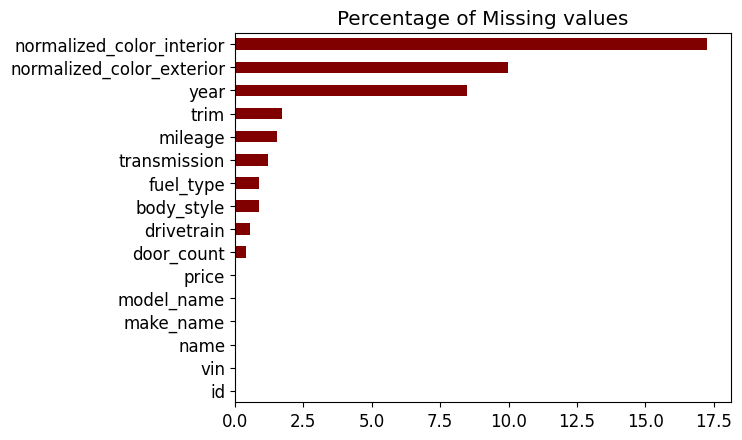

In [ ]:

missing_values(df)

In [ ]:
df = df.drop(['id', 'vin'], axis=1)


In [ ]:
df.shape

(116721, 14)

In [ ]:
# sns.heatmap(df.corr(),annot = True, lw = 0.1)
df=df.dropna()

In [ ]:
df.reset_index(inplace=True,)

In [ ]:
df.drop('index',axis=1,inplace=True)

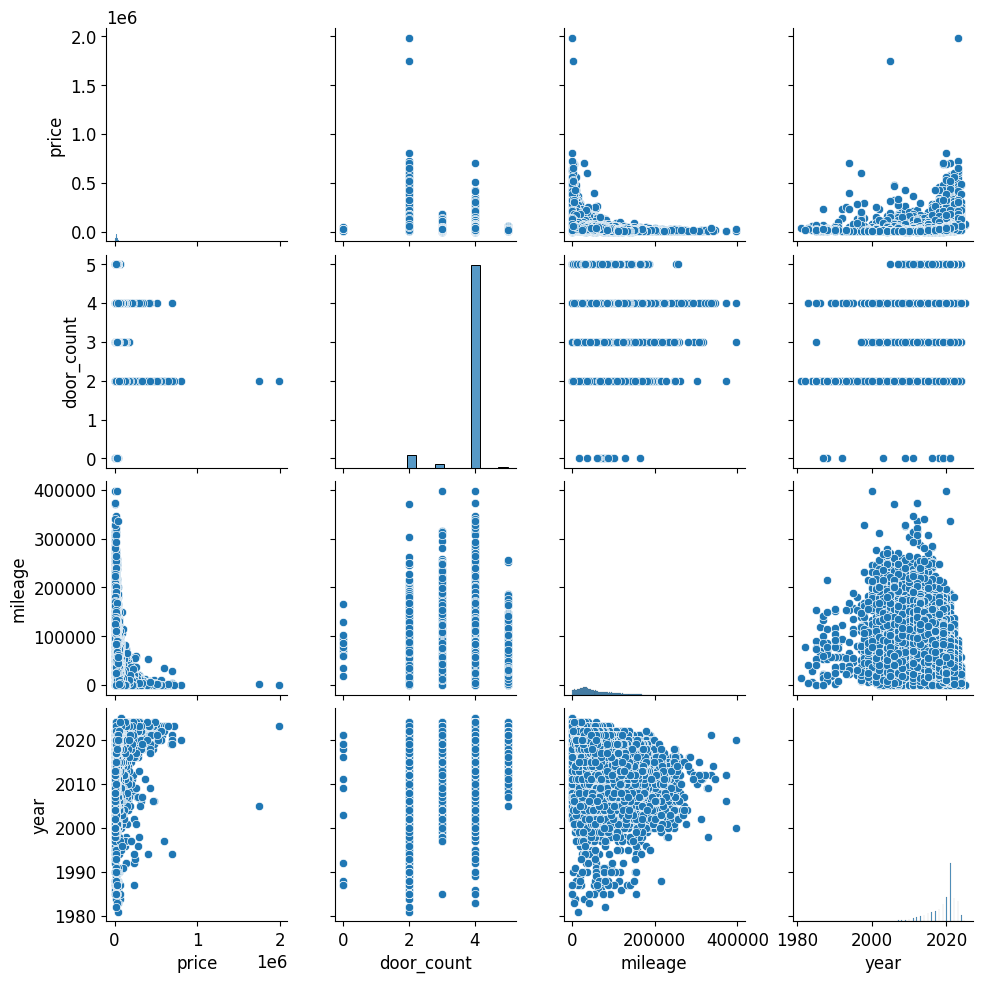

In [ ]:
sns.pairplot(df)

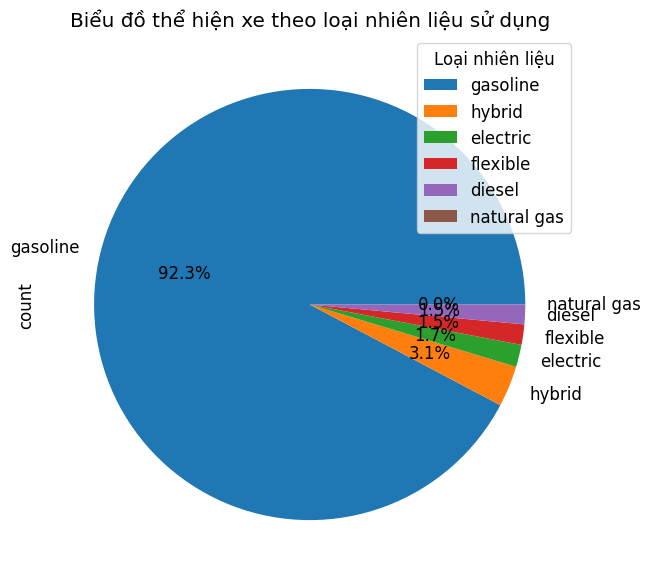

In [ ]:
data=(df['fuel_type'].value_counts())
plt.figure(figsize=(7, 7))
data.plot(kind='pie', autopct='%1.1f%%')
plt.title('Biểu đồ thể hiện xe theo loại nhiên liệu sử dụng')
plt.legend(title = "Loại nhiên liệu")
plt.show()

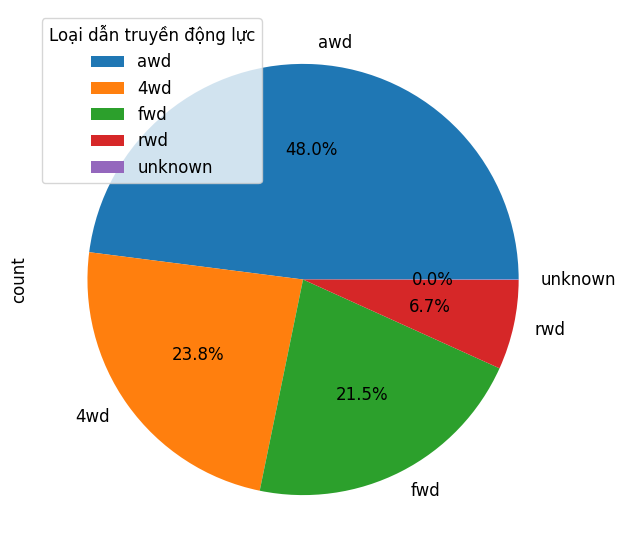

In [ ]:
data=(df['drivetrain'].value_counts()).plot.pie(y='drivetrain', autopct='%1.1f%%', figsize=(7, 7))
plt.legend(title = "Loại dẫn truyền động lực")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'suv'),
  Text(1, 0, 'sedan'),
  Text(2, 0, 'truck'),
  Text(3, 0, 'hatchback'),
  Text(4, 0, 'coupe'),
  Text(5, 0, 'cargo van'),
  Text(6, 0, 'passenger van'),
  Text(7, 0, 'convertible'),
  Text(8, 0, 'wagon')])

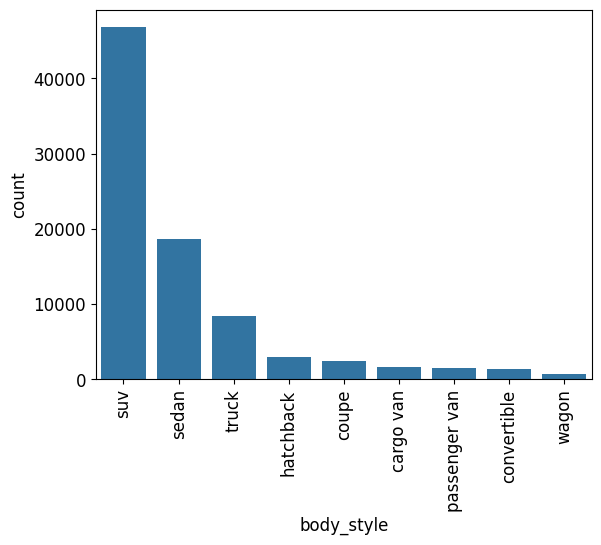

In [ ]:
data = (df['body_style'].value_counts()).reset_index()
data.columns = ['body_style', 'count']
sns.barplot(x='body_style', y='count', data=data)
plt.xticks(rotation=90)



([0, 1, 2, 3, 4],
 [Text(0, 0, '0.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0')])

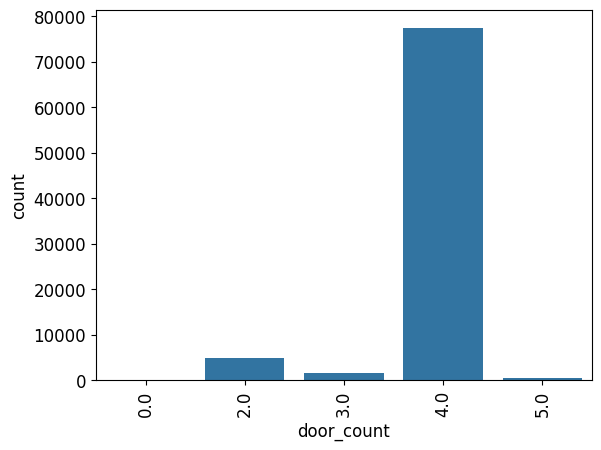

In [ ]:
data = pd.DataFrame(df['door_count'].value_counts()).reset_index()
data.columns = ['door_count', 'count']
sns.barplot(x='door_count', y='count', data=data)
plt.xticks(rotation=90)

In [ ]:
df['door_count'].replace(0, 4, inplace=True)

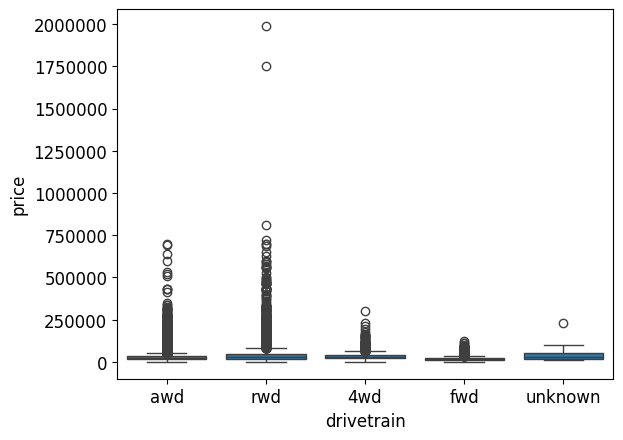

In [ ]:
sns.boxplot(x = 'drivetrain', y = 'price', data = df)
plt.ticklabel_format(style='plain', axis='y')

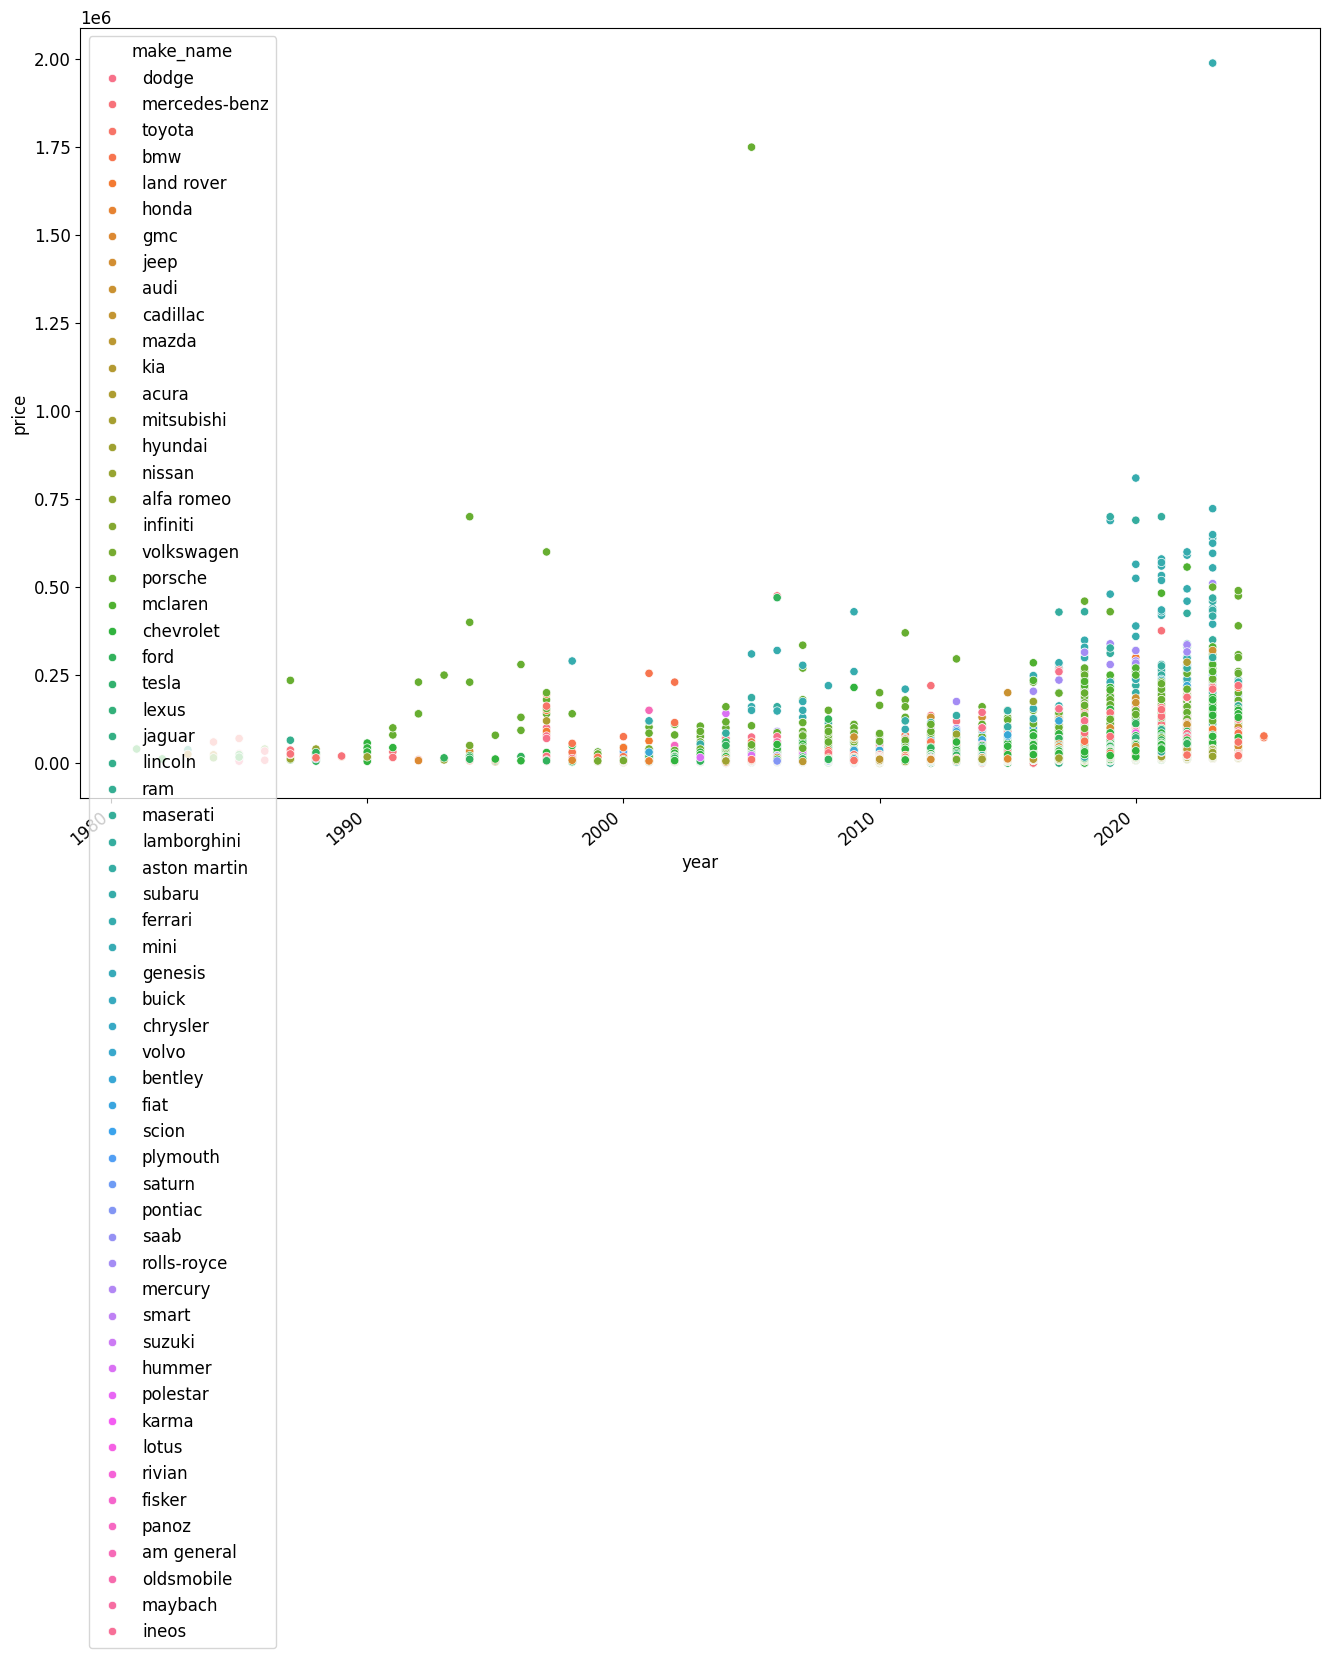

In [ ]:
plt.subplots(figsize=(16,10))
ax=sns.scatterplot(x='year',y='price',data=df,hue=df['make_name'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [ ]:
df['name'] = df['name'].astype('category').cat.codes + 1
df['make_name'] = df['make_name'].astype('category').cat.codes + 1
df['drivetrain'] = df['drivetrain'].astype('category').cat.codes + 1
df['model_name'] = df['model_name'].astype('category').cat.codes + 1
df['normalized_color_exterior'] = df['normalized_color_exterior'].astype('category').cat.codes + 1
df['transmission'] = df['transmission'].astype('category').cat.codes + 1
df['normalized_color_interior'] = df['normalized_color_interior'].astype('category').cat.codes + 1
df['fuel_type'] = df['fuel_type'].astype('category').cat.codes + 1
df['body_style'] = df['body_style'].astype('category').cat.codes + 1
df['trim'] = df['trim'].astype('category').cat.codes + 1

In [ ]:
categorical = ['name','make_name','drivetrain','model_name','normalized_color_exterior','transmission','normalized_color_interior','fuel_type','body_style','trim',]
numerical = [col for col in df.columns if col not in categorical]

<Axes: >

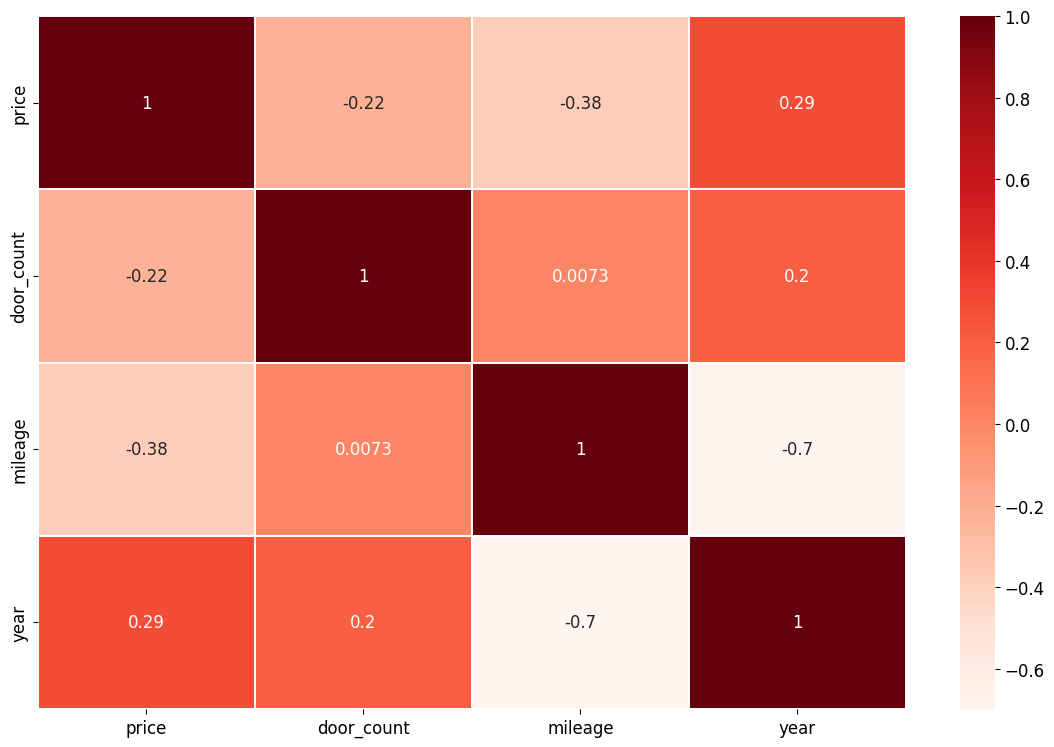

In [ ]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(14, 9))
sns.heatmap(df[numerical].corr(), annot=True, cmap='Reds', linewidths=0.1)

In [ ]:
categorical = ['name','make_name','drivetrain','model_name','normalized_color_exterior','transmission','normalized_color_interior','fuel_type','body_style','trim',]
numerical = [col for col in df.columns if col not in categorical]

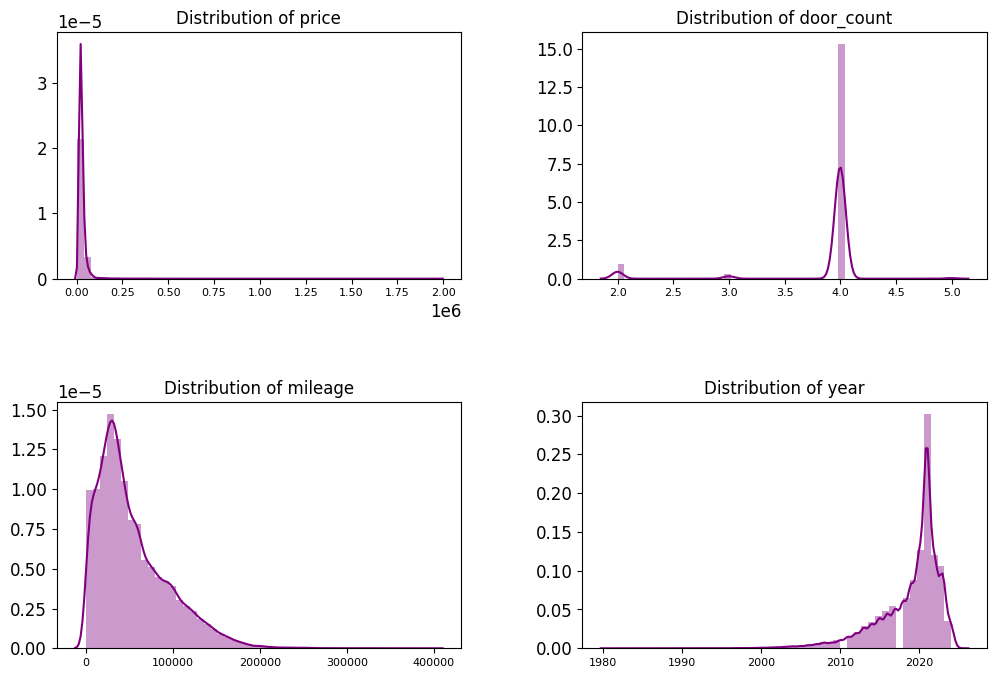

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical = [col for col in df.columns if col not in categorical]

# Tạo một figure mới với kích thước phù hợp
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Lặp qua từng cột số và vẽ biểu đồ phân phối
for i, ax in zip(numerical, axes.flatten()):
    sns.distplot(df[i], ax=ax, color='purple')
    ax.set_title("Distribution of %s" %i, fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x', labelsize=8)

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Hiển thị biểu đồ
plt.show()